### STAR WAYS EXIT SURVEYS

**Background:**
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that `“The Empire Strikes Back”` is clearly the best of the bunch?

As a result, the team needed to collect data addressing this question. To do this,  Star Wars fans were surveyed using the online tool SurveyMonkey. A total of 835 total responses was received. 

**Goal:**
The goal of this project is to answer questions about the `Star Wars Movie` for its fans. This dataset  will be cleaned and explored in this project. 

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars= pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

In [2]:
# Explore the rows and columns

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
# Review list of columns

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning And Mapping Yes or No Column

Consider the following two columns:

- Have you seen any of the 6 films in the Star Wars franchise?

- Do you consider yourself a fan of the Star Wars film franchise?

Each column contains responses to Yes/No questions. If a respondent chose not to answer, the entry may be NaN. The `pandas.Series.value_counts() method` can be applied to each column to display the unique values and how often each appears.

Currently, both columns are stored as strings since most responses are either "Yes" or "No". Converting these to `Boolean values—True, False, and NaN`—makes the data easier to analyze. Boolean values simplify filtering for True or False entries without needing to compare strings.

The `pandas.Series.map() method` can be used on each column to carry out this conversion.

In [4]:
# Convert the two columns into boolean and null values

yes_no = {'Yes' : True, 'No': False}


for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning and Mapping Checkbox Columns

The next six columns correspond to a single checkbox question. The respondent checked a series of boxes in response to the question: Which of the following Star Wars films have been seen? Please select all that apply.

The questions for these columns are as follows:

- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.

- Column labeled Unnamed: 4, indicating whether Star Wars: Episode II Attack of the Clones was seen

- Column labeled Unnamed: 5, indicating whether Star Wars: Episode III Revenge of the Sith was seen

- Column labeled Unnamed: 6, indicating whether Star Wars: Episode IV A New Hope was seen

- Column labeled Unnamed: 7, indicating whether Star Wars: Episode V The Empire Strikes Back was seen

- Column labeled Unnamed: 8, indicating whether Star Wars: Episode VI Return of the Jedi was seen

For each of these columns, if the cell value contains the `name of the movie`, it means the respondent saw the movie. If the `cell value is NaN`, the respondent either did not answer or did not see the movie. The assumption will be that the movie was not seen.

Each of these columns needs to be converted to a Boolean and renamed to something more intuitive. The values can be converted using earlier method, except the mapping dictionary needs to include the movie title and NaN.

In [5]:
# Convert column values to boolean values

movie_bool = {
    'Star Wars: Episode I  The Phantom Menace': True, 
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_bool)


In [6]:

# Rename column names    
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
    'Unnamed: 4': 'seen_2', 
    'Unnamed: 5': 'seen_3', 
    'Unnamed: 6': 'seen_4', 
    'Unnamed: 7': 'seen_5', 
    'Unnamed: 8': 'seen_6'
})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning The Ranking Columns

In [7]:
# Convert the ranking columns dtype

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename column names

star_wars = star_wars.rename(columns= {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
       'Unnamed: 10': 'ranking_2', 
        'Unnamed: 11': 'ranking_3',
        'Unnamed: 12': 'ranking_4',
        'Unnamed: 13': 'ranking_5',
       'Unnamed: 14': 'ranking_6'})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Finding the Highest Ranked Movie

In [8]:
# Compute the mean of the ranking columns
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

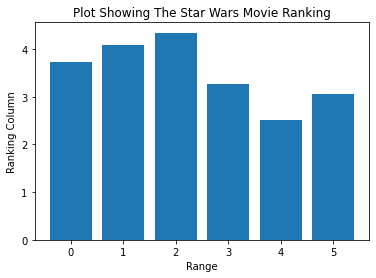

In [9]:
# Plot a bar chart for the ranking columns
%matplotlib inline
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title('Plot Showing The Star Wars Movie Ranking')
plt.xlabel('Range')
plt.ylabel('Ranking Column')
plt.show()

### Explanation of Rankings
So far, the ranking of the star wars movie have been cleaned, aggregated and plotted for visual representation. 

The rankings show that respondents favored the `prequel trilogy (Episodes I–III)`, with `Revenge of the Sith rated highest` and `The Empire Strikes Back lowest`, contrary to critical consensus. This may reflect the demographic of the respondents—likely younger viewers who grew up with the prequels and prefer their fast-paced action and modern effects. Nostalgia, familiarity, and visual appeal of the prequels may have outweighed the slower, more character-driven original trilogy. The unusual rankings could also result from sample bias, misinterpretation of the scale, or limited exposure to the older films.

### Finding the Most Viewed Movie

In [10]:
# Compute the sum of the seen columns
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

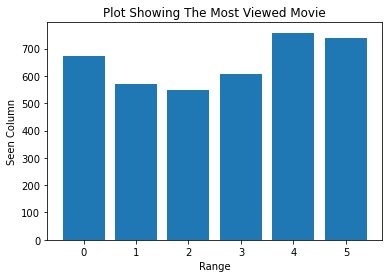

In [11]:
#Plot a bar chart for the column
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.title('Plot Showing The Most Viewed Movie')
plt.xlabel('Range')
plt.ylabel('Seen Column')
plt.show()

### Analysis of Star Wars Viewing Counts and Rankings
The viewing counts show that The `Empire Strikes Back (758) and Return of the Jedi (738) were the most-watched films among respondents, followed by The Phantom Menace (673), A New Hope (607), Attack of the Clones (571), and Revenge of the Sith (550).` This pattern aligns with the historical popularity and cultural impact of the original trilogy (Episodes IV–VI), which has been widely regarded as essential viewing for Star Wars fans. The higher counts for the originals may also reflect their longer availability and iconic status.

Interestingly, the rankings do not align with the viewing counts. `Despite being the most-watched, The Empire Strikes Back and Return of the Jedi ranked lowest in preference, while Revenge of the Sith, which had the lowest viewership, received the highest ranking.` This suggests that while more respondents have seen the original trilogy, they may have enjoyed the prequels more. The discrepancy highlights a generational difference in taste, where younger viewers appreciate the prequels despite having seen the originals.

### Explore the Data by Binary Segments
The highest-ranked movies for the overall survey population are already identified. Next, the responses from specific segments of the population can be examined. The dataset includes several columns that divide respondents into two groups. Examples include:

- Considered a fan of the Star Wars film franchise — True or False

- Considered a fan of the Star Trek franchise — Yes or No

- Gender — Male or Female

The DataFrame can be split into two groups based on any of these binary columns by creating two subsets corresponding to the two values.